

### **Simple Linear Regression**
In this regression task I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## **Importing the libraries.**

In [2]:
# Importing all libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## **Reading the dataset**

In [5]:
# Reading data 
url = "http://bit.ly/w-data"
sdata = pd.read_csv(url)
print("Data imported successfully")
print("First 8 rows of the dataset")
sdata.head(8)

Data imported successfully
First 8 rows of the dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [6]:
print("Last 8 rows of the dataset")
sdata.tail(8)

Last 8 rows of the dataset


,Hours,Scores
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## **Check for Null Values**

In [34]:
sdata.isnull().values.any()

False

## **Describing the dataset**

In [8]:
print(sdata.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [37]:
#correlation 
sdata.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

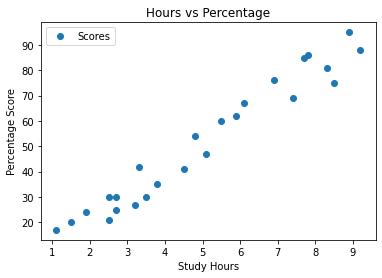

In [36]:
# Plotting the distribution of scores
sdata.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('Percentage Score')  
plt.show()

In the graph above, we see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [18]:
X = sdata.iloc[:, :-1].values  
print("Input values are:")
print(X)
y = sdata.iloc[:, 1].values  
print("Output values are:")
print(y)

Input values are:
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Output values are:
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


To test any dataset we need to divide it into training and test sets. We can do this by using Scikit-Learn's built-in train_test_split() method:

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


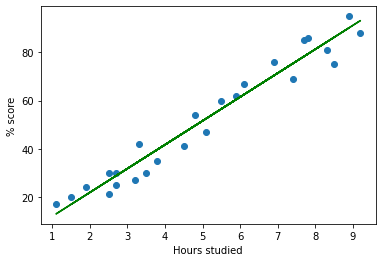

In [23]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, c='green');
plt.xlabel('Hours studied')
plt.ylabel('% score')
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [24]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


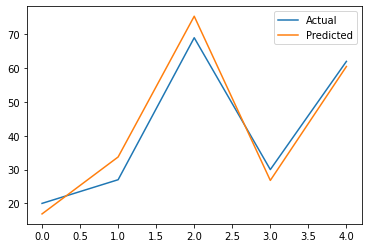

In [29]:
df.plot()

In [32]:
hours = 9.25
own = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
